<a href="https://colab.research.google.com/github/nerdyalgorithm/EmotiWave/blob/main/mainfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data sorting


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/drive/MyDrive/fer2013.csv.zip")

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


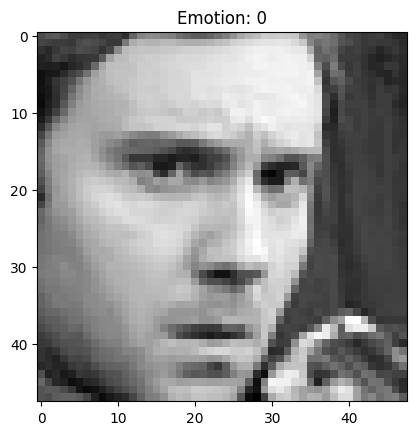

In [4]:
pixels = df['pixels'][0]  # pick first image
pixels = np.array([int(p) for p in pixels.split()], dtype='uint8')  # convert to array
img = pixels.reshape(48, 48)  # turn into 48x48 image

plt.imshow(img, cmap='gray')
plt.title(f"Emotion: {df['emotion'][0]}")
plt.show()

In [5]:
print(df.columns)

# Total rows
print("Total rows:", len(df))

# 1. missing pixel strings
missing_pixels = df['pixels'].isnull().sum()
print("Rows with missing pixels:", missing_pixels)

# 2. Any missing emotion labels?
missing_emotions = df['emotion'].isnull().sum()
print("Rows with missing emotion labels:", missing_emotions)

# 3. Check if any row has pixel count ≠ 2304
def pixel_count_ok(p):
    return len(p.split()) == 48 * 48

bad_pixel_rows = df[~df['pixels'].apply(pixel_count_ok)]
print("Rows with incorrect pixel length:", len(bad_pixel_rows))

# Show a few bad rows if they exist
if len(bad_pixel_rows) > 0:
    print(bad_pixel_rows.head())

Index(['emotion', 'pixels', 'Usage'], dtype='object')
Total rows: 35887
Rows with missing pixels: 0
Rows with missing emotion labels: 0
Rows with incorrect pixel length: 0


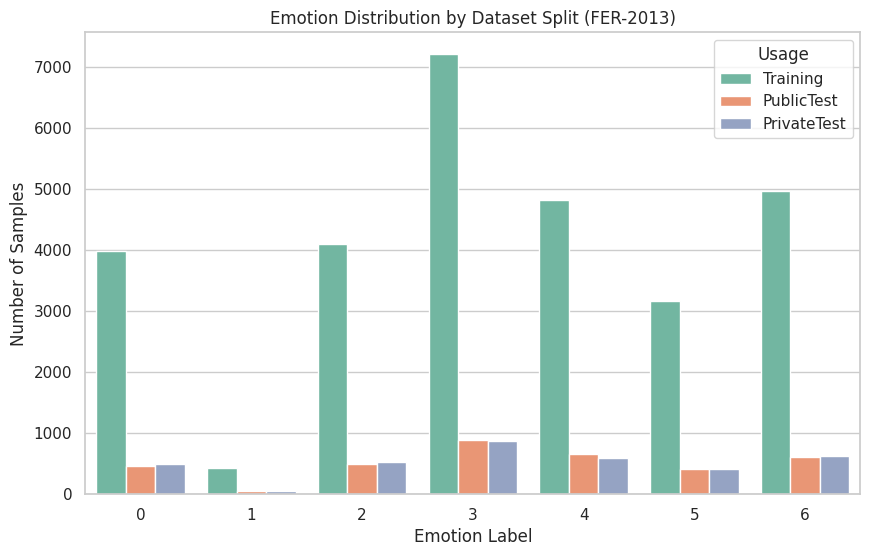

In [6]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='emotion', hue='Usage', data=df, palette='Set2')
plt.title('Emotion Distribution by Dataset Split (FER-2013)')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Samples')
plt.legend(title='Usage')
plt.show()


In [7]:
train_df = df[df['Usage'] == 'Training']
val_df   = df[df['Usage'] == 'PublicTest']
test_df  = df[df['Usage'] == 'PrivateTest']

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")





Training samples: 28709
Validation samples: 3589
Test samples: 3589


In [8]:
train_df.head()      # Shows first few rows of training set


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
val_df.sample(3)     # Shows 3 random rows from validation set


,emotion,pixels,Usage
32192,6,254 252 254 251 171 156 159 156 153 152 154 15...,PublicTest
30032,4,192 190 189 186 177 165 162 183 200 214 221 22...,PublicTest
30234,6,255 254 253 253 253 251 251 246 254 144 12 17 ...,PublicTest


In [10]:
test_df.tail()       # Shows last few rows of test set

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [11]:
df['Usage'].value_counts()


,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


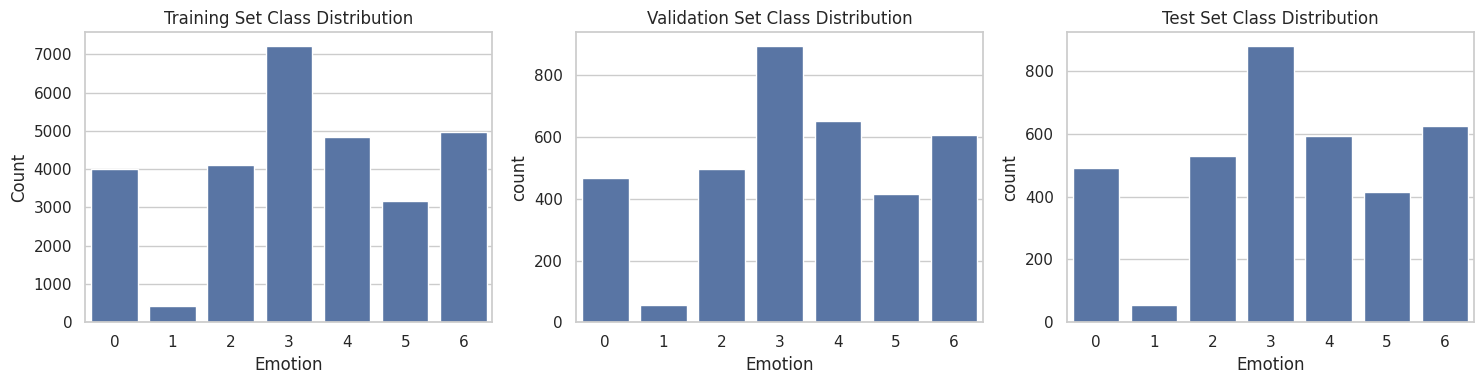

In [12]:
# Set figure size for readability
plt.figure(figsize=(15, 4))

# Training set
plt.subplot(1, 3, 1)
sns.countplot(data=train_df, x='emotion')
plt.title("Training Set Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")

# Validation set
plt.subplot(1, 3, 2)
sns.countplot(data=val_df, x='emotion')
plt.title("Validation Set Class Distribution")
plt.xlabel("Emotion")

# Test set
plt.subplot(1, 3, 3)
sns.countplot(data=test_df, x='emotion')
plt.title("Test Set Class Distribution")
plt.xlabel("Emotion")

plt.tight_layout()
plt.show()


In [13]:
# Step 1: Drop all rows where emotion is 1 (disgust)
df = df[df['emotion'] != 1]

# Step 2: Create a label mapping to remap the labels to a new range (0–5)
label_map = {
    0: 0,  # anger stays 0
    2: 1,  # fear becomes 1
    3: 2,  # happy becomes 2
    4: 3,  # sad becomes 3
    5: 4,  # surprise becomes 4
    6: 5   # neutral becomes 5
}

# Step 3: Apply the mapping to the 'emotion' column
df['emotion'] = df['emotion'].map(label_map)

# Optional: Double-check the result
print("Unique emotion labels after remapping:", sorted(df['emotion'].unique()))


Unique emotion labels after remapping: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


/tmp/ipython-input-1262533199.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion'] = df['emotion'].map(label_map)


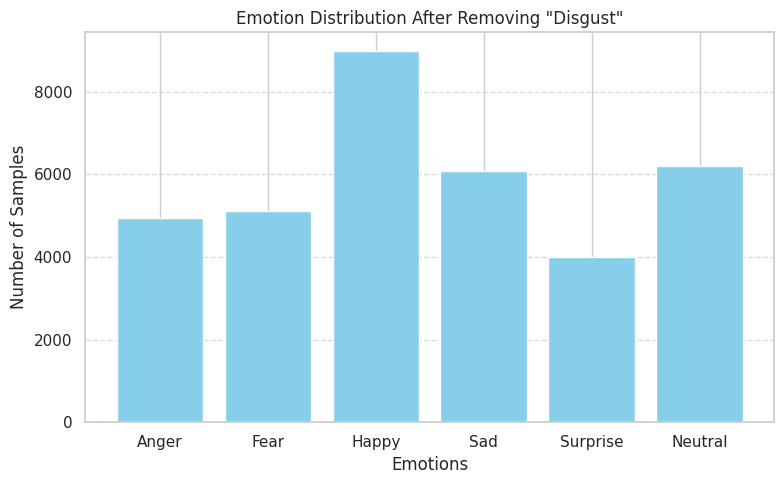

In [14]:
# Count samples per emotion
emotion_counts = df['emotion'].value_counts().sort_index()

# Emotion names after remapping (0–5)
emotion_labels = ['Anger', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, emotion_counts, color='skyblue')
plt.title('Emotion Distribution After Removing "Disgust"')
plt.xlabel('Emotions')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Balance by Undersampling happy (class 2)

In [15]:
# Step 1: Separate the majority class ('happy' = 2) and other classes
happy_df = df[df['emotion'] == 2]
other_df = df[df['emotion'] != 2]

# Step 2: Undersample the 'happy' class to 5000 samples
happy_df_downsampled = happy_df.sample(n=5000, random_state=42)

# Step 3: Combine back with the rest of the dataset
balanced_df = pd.concat([happy_df_downsampled, other_df])

# Step 4: Shuffle the new balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [16]:
#verify
balanced_df['emotion'].value_counts().sort_index()


,count
emotion,
0,4953
1,5121
2,5000
3,6077
4,4002
5,6198


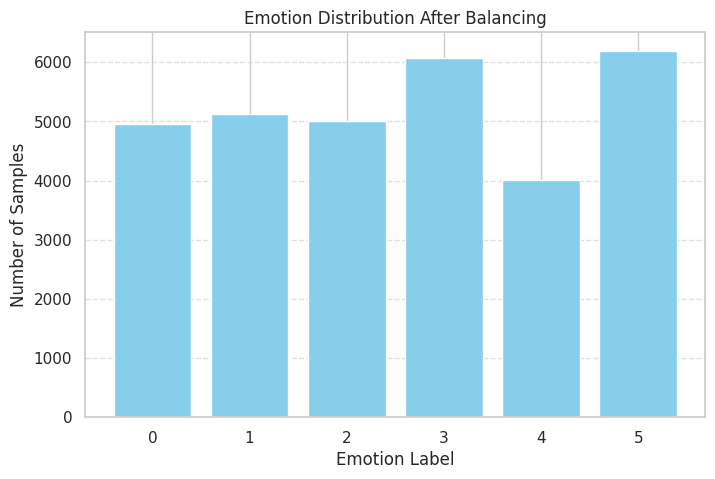

In [17]:
# Count how many samples for each emotion label
emotion_counts = balanced_df['emotion'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.title('Emotion Distribution After Balancing')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Samples')
plt.xticks(emotion_counts.index)  # show labels 0 to 6
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Split the Balanced Dataset

In [18]:
from sklearn.model_selection import train_test_split
# 1. First, split off 80% for training, 20% for temp (val + test)
train_df, temp_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['emotion'], random_state=42)

# 2. Then split the temp into 50% validation, 50% test → overall 10% each
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['emotion'], random_state=42)

# Confirm sizes
print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Test set: {len(test_df)} samples")

Train set: 25080 samples
Validation set: 3135 samples
Test set: 3136 samples


# CNN MODEL TRANING WITH PYTORCH


💡 This section will include:

CNN model architecture

Loss & optimizer setup

Training + validation loop

Accuracy/loss visualization


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


CUDA available: True
GPU: Tesla T4
Using device: cuda
Epoch [1/20], Train Loss: 1.7588, Val Loss: 1.6228, Train Acc: 24.29%, Val Acc: 32.06%
Epoch [2/20], Train Loss: 1.6281, Val Loss: 1.4784, Train Acc: 31.05%, Val Acc: 41.91%
Epoch [3/20], Train Loss: 1.5590, Val Loss: 1.4615, Train Acc: 34.30%, Val Acc: 42.46%
Epoch [4/20], Train Loss: 1.5266, Val Loss: 1.3880, Train Acc: 35.64%, Val Acc: 46.79%
Epoch [5/20], Train Loss: 1.4983, Val Loss: 1.3541, Train Acc: 36.24%, Val Acc: 47.08%
Epoch [6/20], Train Loss: 1.4801, Val Loss: 1.3467, Train Acc: 37.42%, Val Acc: 48.48%
Epoch [7/20], Train Loss: 1.4673, Val Loss: 1.3284, Train Acc: 38.73%, Val Acc: 48.61%
Epoch [8/20], Train Loss: 1.4542, Val Loss: 1.2897, Train Acc: 39.19%, Val Acc: 50.21%
Epoch [9/20], Train Loss: 1.4382, Val Loss: 1.2726, Train Acc: 39.98%, Val Acc: 50.56%
Epoch [10/20], Train Loss: 1.4274, Val Loss: 1.2754, Train Acc: 40.36%, Val Acc: 50.24%
Epoch [11/20], Train Loss: 1.4208, Val Loss: 1.2842, Train Acc: 40.74%, Val

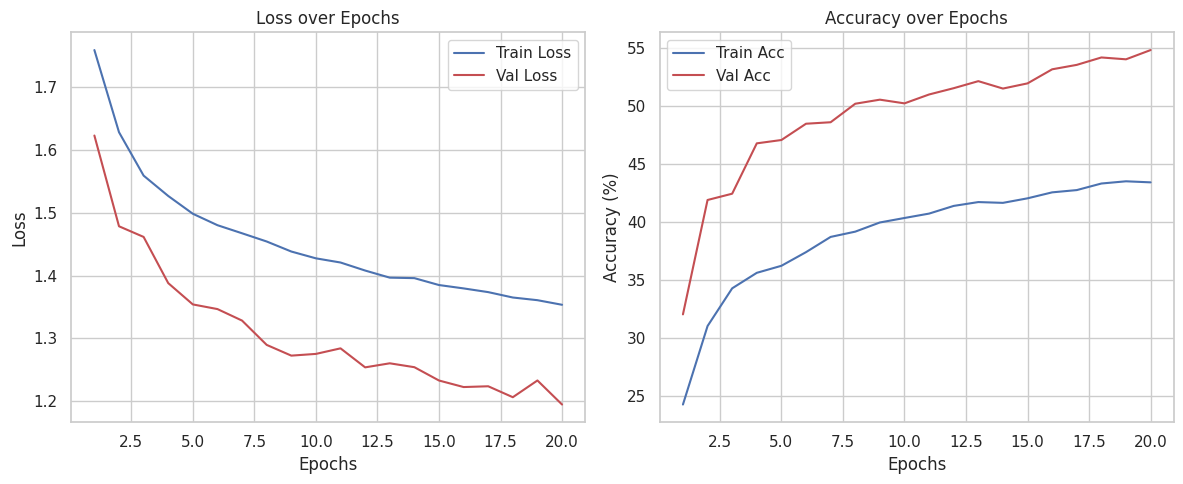

In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Verify GPU availability
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Assuming train_df, val_df, test_df exist from your preprocessing
# If not, rerun your preprocessing (load FER-2013, remove 'disgust', balance 'happy', split)

# Define dataset class
class FER2013Dataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        pixels = np.array([int(p) for p in self.df['pixels'].iloc[idx].split()], dtype='uint8')  # uint8 for PIL
        image = pixels.reshape(48, 48)  # 2D array (48x48)
        label = self.df['emotion'].iloc[idx]

        image = Image.fromarray(image)  # Convert to PIL Image

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(label, dtype=torch.long)
        return image, label

# Define transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Create datasets
train_dataset = FER2013Dataset(train_df, transform=train_transform)
val_dataset = FER2013Dataset(val_df, transform=test_transform)
test_dataset = FER2013Dataset(test_df, transform=test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

# Define CNN with batch normalization
class EmotionCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(EmotionCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 6 * 6, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize model, loss, and optimizer
model = EmotionCNN(num_classes=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)

        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    return train_loss_list, val_loss_list, train_acc_list, val_acc_list

# Plot loss and accuracy
def plot_metrics(train_loss, val_loss, train_acc, val_acc):
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r-', label='Val Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b-', label='Train Acc')
    plt.plot(epochs, val_acc, 'r-', label='Val Acc')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run training
try:
    train_loss, val_loss, train_acc, val_acc = train_model(
        model, train_loader, val_loader, criterion, optimizer, num_epochs=20
    )
    # Plot results
    plot_metrics(train_loss, val_loss, train_acc, val_acc)
except Exception as e:
    print(f"Training failed with error: {e}")

In [23]:
print(train_df['emotion'].value_counts())
print(val_df['emotion'].value_counts())
print(test_df['emotion'].value_counts())

emotion
5    4958
3    4861
1    4097
2    4000
0    3962
4    3202
Name: count, dtype: int64
emotion
5    620
3    608
1    512
2    500
0    495
4    400
Name: count, dtype: int64
emotion
5    620
3    608
1    512
2    500
0    496
4    400
Name: count, dtype: int64


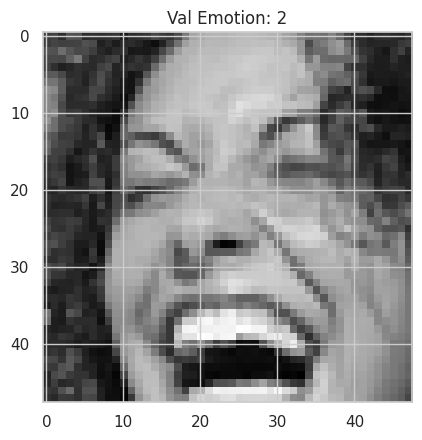

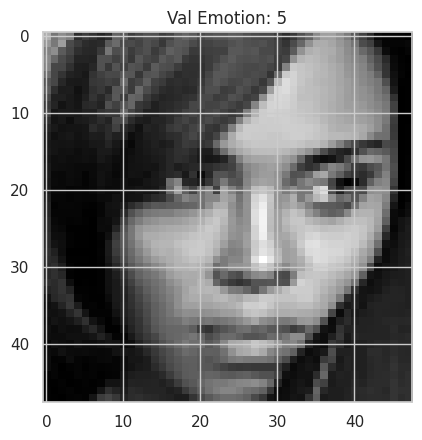

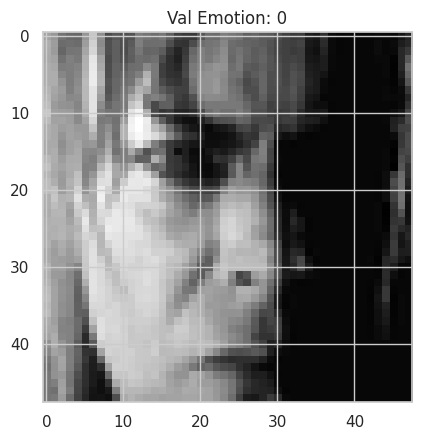

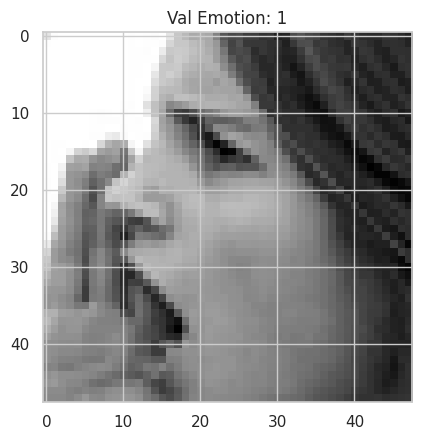

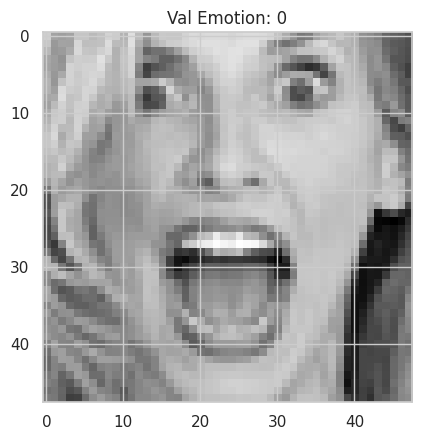

In [24]:
import matplotlib.pyplot as plt
for i in range(5):
    pixels = np.array([int(p) for p in val_df['pixels'].iloc[i].split()], dtype='uint8')
    img = pixels.reshape(48, 48)
    plt.imshow(img, cmap='gray')
    plt.title(f"Val Emotion: {val_df['emotion'].iloc[i]}")
    plt.show()

## CONFUSION MATRIX

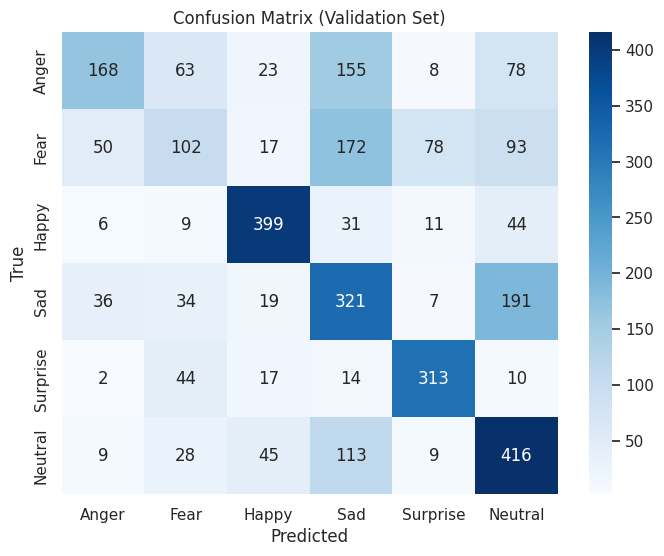

Confusion Matrix (Validation Set) - 12:49 AM WAT, July 31, 2025
Predicted ->
Anger      |  168   63   23  155    8   78
Fear       |   50  102   17  172   78   93
Happy      |    6    9  399   31   11   44
Sad        |   36   34   19  321    7  191
Surprise   |    2   44   17   14  313   10
Neutral    |    9   28   45  113    9  416


In [27]:
from sklearn.metrics import confusion_matrix
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
emotion_labels = ['Anger', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print text version of confusion matrix
print("Confusion Matrix (Validation Set) - 12:49 AM WAT, July 31, 2025")
print("Predicted ->")
for i, true_label in enumerate(emotion_labels):
    row = [cm[i][j] for j in range(len(emotion_labels))]
    print(f"{true_label:10} | {' '.join(f'{x:4d}' for x in row)}")

##inference code with uncertainty messaging

In [35]:
import torch
import numpy as np

emotion_labels = ['Anger', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_with_uncertainty(image_tensor):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device).unsqueeze(0)  # [1, 1, 48, 48]
        outputs = model(image_tensor)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]

        # Get top 2 predictions
        top2_probs, top2_classes = torch.topk(torch.tensor(probabilities), 2)
        top_prob, top_class = top2_probs[0], top2_classes[0]
        second_prob, second_class = top2_probs[1], top2_classes[1]

        # Thresholds: 70% confidence, 20% gap
        if top_prob < 0.7 and (top_prob - second_prob) < 0.2:
            guess = f"I don’t know if you’re {emotion_labels[second_class]} or {emotion_labels[top_class]}, " \
                    f"but I’m guessing you’re {int(top_prob * 100)}% {emotion_labels[top_class]}… how do you feel?"
            return guess, top_class.item(), top_prob.item()
        else:
            return f"I’m {int(top_prob * 100)}% sure you’re {emotion_labels[top_class]}", top_class.item(), top_prob.item()


## webcam testing code [opencv]

In [36]:
import cv2
from torchvision import transforms
import torch.nn.functional as F

# Preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (48, 48))
    face_tensor = transform(face).unsqueeze(0).to(device)  # [1, 1, 48, 48]

    try:
        message, predicted_class, confidence = predict_with_uncertainty(face_tensor[0])
        print(message)
        cv2.putText(frame, message, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    except Exception as e:
        print("Error:", e)

    cv2.imshow("Webcam Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


#saving and downloadng to local machine


In [38]:
import torch

# Save model
model_path = '/content/emotion_model.pth'
torch.save(model.state_dict(), model_path)


In [39]:
#download to local machine
from google.colab import files

files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#export cleaned/preprocessed dataset

In [42]:
# Save full cleaned & balanced dataset
balanced_df.to_csv('/content/fer2013_cleaned.csv', index=False)



In [43]:
train_df.to_csv('/content/fer2013_train.csv', index=False)
val_df.to_csv('/content/fer2013_val.csv', index=False)
test_df.to_csv('/content/fer2013_test.csv', index=False)


In [44]:
from google.colab import files

# Download cleaned full dataset
files.download('/content/fer2013_cleaned.csv')

# Optionally download splits
files.download('/content/fer2013_train.csv')
files.download('/content/fer2013_val.csv')
files.download('/content/fer2013_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>